### GOAL: Build a simple implementation of gradient-boosted trees from scratch to predict housing prices in California.

---
---

### 1. Get the Data

In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

california = fetch_california_housing()

X = pd.DataFrame(california['data'], columns = california['feature_names'])
y = pd.Series(california['target'])

X = X.iloc[:5000]
y = y.iloc[:5000]

In [2]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
4995,1.8317,47.0,5.061420,1.128599,1903.0,3.652591,33.99,-118.30
4996,1.9853,47.0,3.992780,0.962094,1903.0,3.435018,33.99,-118.30
4997,1.2750,46.0,3.751092,1.023290,2446.0,3.560408,33.99,-118.28
4998,2.0542,46.0,4.422535,1.066398,2067.0,4.158954,33.99,-118.29


### 2. Start with an initial prediction ("bad" first guess)

In [3]:
y_0 = np.array([y.mean() for i in range(len(y))])

Text(0.5, 1.0, 'Median Price of House Block, 100k USD')

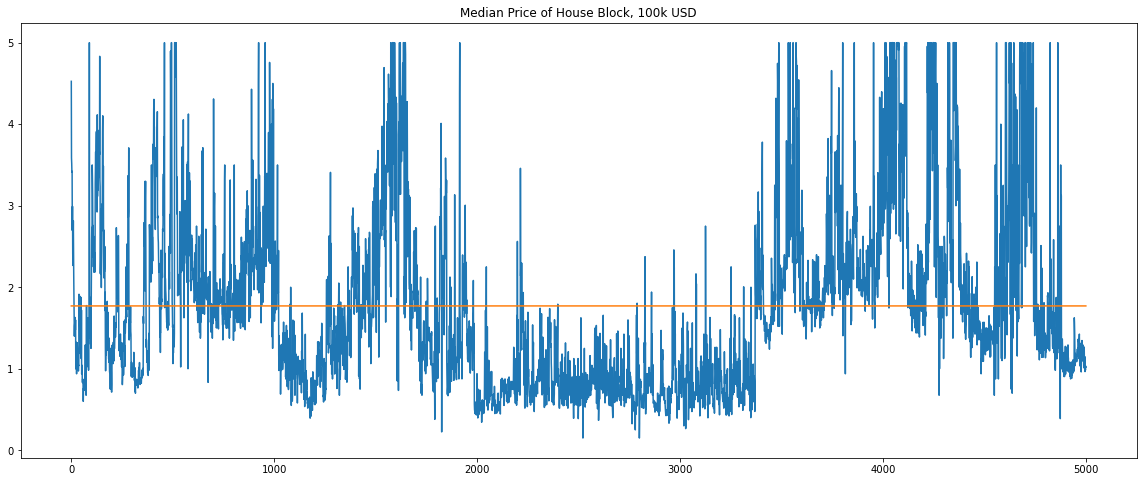

In [4]:
plt.figure(figsize=(20, 8))
plt.plot(y)
plt.plot(y_0)
plt.title('Median Price of House Block, 100k USD')

### 3. Write an error function (i.e. something that tells us how good or bad our prediction is)

In [5]:
def calc_error(ytrue, ypred):
    """ytrue and ypred are single values in a numpy array"""
    
    return (ytrue - ypred)**2 / 2

In [6]:
calc_error(y, y_0).mean()

0.5795212992846327

### 4. Visualize the error gradient
- Brief recap on gradients:
    - For every sample's prediction (i.e. the ypred for each point), I not only want to know the error, but the SLOPE / GRADIENT of the error with respect to the prediction.


Text(0, 0.5, 'Error')

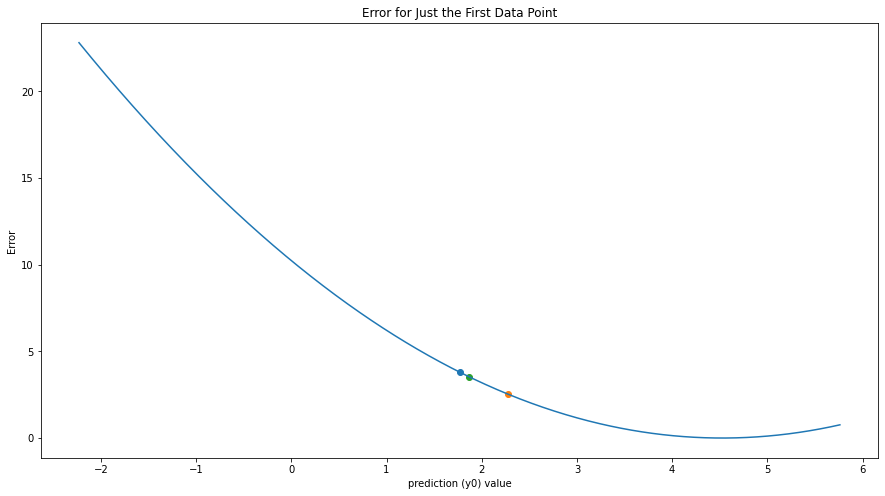

In [7]:
losses = []
prediction_range = np.arange(-4, 4, 0.01)

#Values for the first point, just as an example
y_actual = y[0]
y_pred = y_0[0]

for i in prediction_range:
    error = calc_error(y_actual, y_pred + i)
    losses.append(error)

fig, ax = plt.subplots(figsize=(15,8)) 

ax.scatter(y_pred, calc_error(y_actual, y_pred))
ax.scatter(y_pred + 0.5, calc_error(y_actual, y_pred + 0.5)) #small step
ax.scatter(y_pred + 0.1, calc_error(y_actual, y_pred + 0.1)) #smaller step


ax.plot(y_pred + prediction_range, losses)
ax.set_title('Error for Just the First Data Point')
ax.set_xlabel('prediction (y0) value')
ax.set_ylabel('Error')

In [8]:
delta_pred = 0.00000001


slope = (calc_error(y_pred + delta_pred, y_actual) - calc_error(y_pred, y_actual)) / delta_pred

In [9]:
slope #the value of the tangent, or derivate of a single point on the curve.

-2.7552827575050287

### 5. Calculate the Derivative / Gradient 
(for convenience)

$$error = \frac{( y-\hat{y})^2}{2}$$

$$\frac{\delta (error)}{\delta \hat{y}}  = -1*( y-\hat{y})$$

In [10]:
def calc_gradient(ytrue, ypred):
    """Derivative of error function with respect to the ypred."""
    
    return -(ytrue - ypred)

In [11]:
calc_gradient(y, y_0) #pretty close for the first point!

0      -2.755283
1      -1.814283
2      -1.750283
3      -1.642283
4      -1.651283
          ...   
4995    0.805717
4996    0.759717
4997    0.787717
4998    0.736717
4999    0.751717
Length: 5000, dtype: float64

### 6. Calculate the pseudo-residuals
- The pseudo residuals are just the negative of the error gradient

In [12]:
pseudo_residuals = -calc_gradient(y, y_0)

### 7. Train a weak model on the data to predict these pseudo-residuals


In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
regressor = DecisionTreeRegressor(max_depth=1)

In [15]:
regressor.fit(X, pseudo_residuals)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 5.586\nmse = 1.159\nsamples = 5000\nvalue = 0.0'),
 Text(83.7, 54.360000000000014, 'mse = 0.769\nsamples = 4441\nvalue = -0.21'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 1.133\nsamples = 559\nvalue = 1.665')]

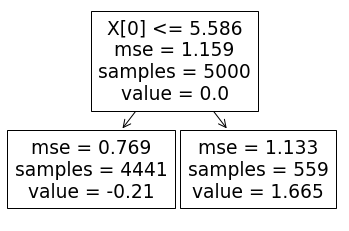

In [16]:
from sklearn.tree import plot_tree
plot_tree(regressor)

In [17]:
# plt.figure(figsize=(20,8))
# plt.plot(y)
# plt.plot(pseudo_residuals)
# plt.plot(regressor.predict(X))
# plt.legend(['true data', 'pseudo residuals', 'tree prediction'])


### 8. Make new predictions!

In [18]:
y_1 = y_0 + regressor.predict(X)

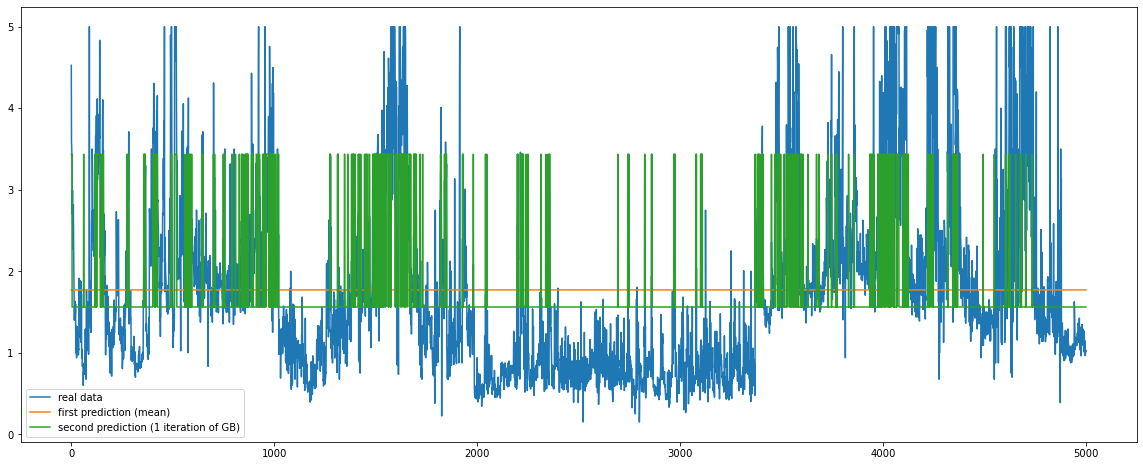

In [19]:
plt.figure(figsize=(20,8))
plt.plot(y)
plt.plot(y_0)
plt.plot(y_1)
plt.legend(['real data', 'first prediction (mean)', 'second prediction (1 iteration of GB)'])

In [20]:
calc_error(y, y_1).mean()

0.405041051757747

In [21]:
### SECOND ITERATION

#1. Calculate Pseudo-Residuals
pseudo_residuals = -calc_gradient(y, y_1)
regressor.fit(X, pseudo_residuals)
y_2 = y_1 + regressor.predict(X)



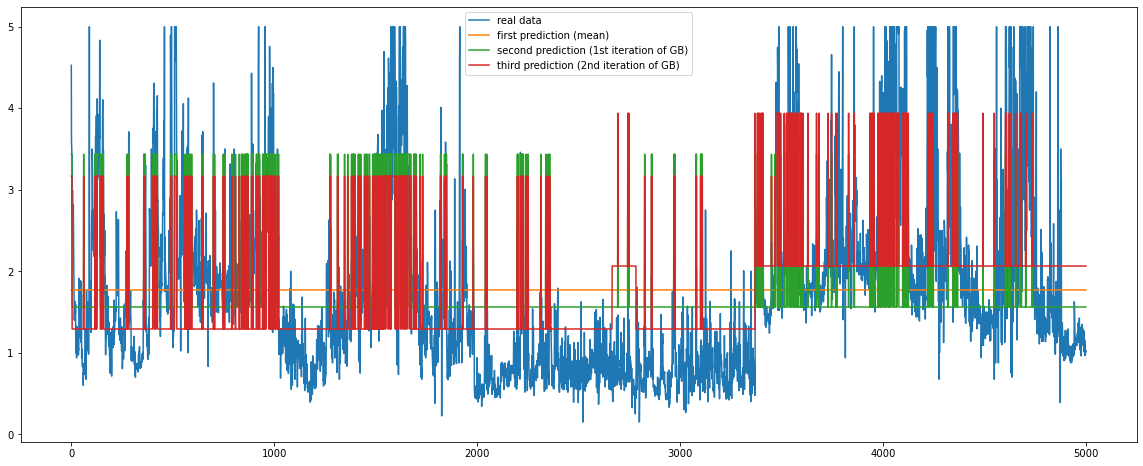

In [22]:
plt.figure(figsize=(20,8))
plt.plot(y)
plt.plot(y_0)
plt.plot(y_1)
plt.plot(y_2)
plt.legend(['real data', 'first prediction (mean)', 'second prediction (1st iteration of GB)', 'third prediction (2nd iteration of GB)'])


---

### 9. Put it all into a loop!

In [36]:
def gradient_boost_train(X, y, n):
    
    """Simple version of Gradient Boosted Decision Tree Algorithm"""
    
    y_hat = np.array([y.mean()] * len(y)) #first crappy guess. just guess the mean for all data points
    
    regressors = []
    
    y_0 = y_hat
    
    for i in range(n):
        
        #Calculate pseudo-residuals
        pseudo_residuals = -calc_gradient(y, y_hat)
        
        #Build a simple decision tree to predict pseudo-residuals from X
        regressor = DecisionTreeRegressor(max_depth=1)
        regressor.fit(X, pseudo_residuals)
        
        #Collect the fitted trees as we go
        regressors.append(regressor)
        
        #Try to reproduce the pseudo-residuals (model output), and add that to our old prediction
        y_hat = y_hat + regressor.predict(X)
        
    return regressors, y_0[0]
        
        
        

In [37]:
regressors, y0 = gradient_boost_train(X, y, 50)

In [38]:
y0

1.7707172399999909

### Step 10. Make some predictions!

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
def gradient_boost_predict(regressors, y_0, X_test):
    
    """Takes the pre-trained models and use them in series to make predictions"""
    
    y_hat = np.array([y_0] * len(X_test))
    
    for r in regressors:
        
        y_hat = y_hat + r.predict(X_test)
    
    return y_hat

In [43]:
### STEP 1: Train Models
regressors, y_0 = gradient_boost_train(X_train, y_train, 50)

### Step 2: PREDICT

final_prediction = gradient_boost_predict(regressors, y_0, X_test)

In [53]:
import pandas as pd

df = pd.DataFrame(index = y_test.index, data={'y_test':y_test.values, 'prediction': final_prediction})

In [58]:
df = df.sort_index()

<AxesSubplot:>

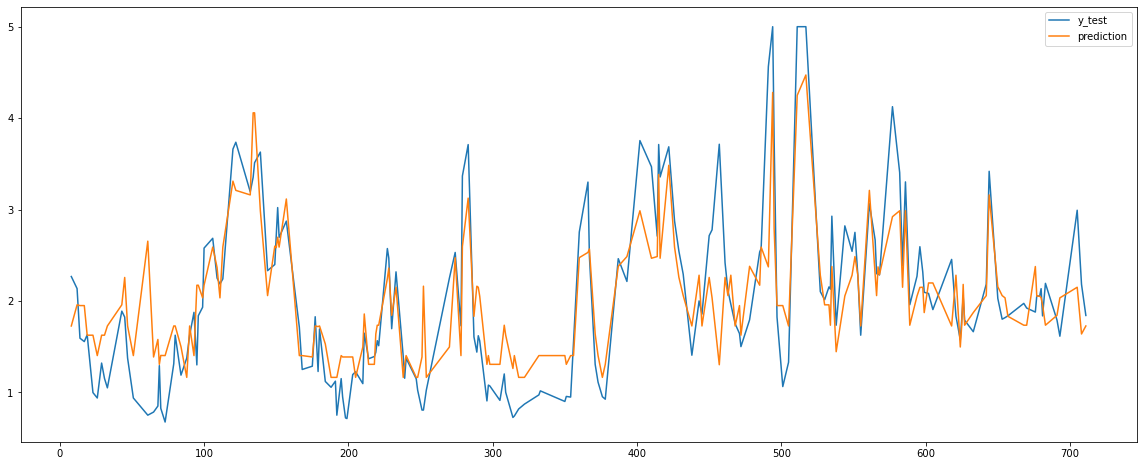

In [62]:
df.iloc[:200].plot(figsize=(20, 8))

In [65]:
calc_error(df['y_test'], df['prediction']).mean()

0.12308767173456303

---

### Python Implementations (outside of sklearn)

1. Catboost (Yandex) - 2017
2. LightGBM (Microsoft) - 2016
3. XGBoost (open-source) - 2014

---